In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np



In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 [==============================] - 4s 0us/step


**CIFAR-10**  is an established computer-vision dataset **used for object recognition**. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class.

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



Keras **Conv2D** is a 2D Convolution Layer, this layer creates a convolution kernel
that is wind with layers input which helps produce a tensor of outputs.

**MaxPooling2D** downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size ) for each channel of the input.

**flatten()** method in Python is used to return a copy of a given array in such a way that it is collapsed into one dimension.

Tensorflow **dense** is the type of layer and function available in Neural networks while implementing Artificial Intelligence and deep learning in a python programming language

**dropout** i.e Dropping out can be seen as temporarily deactivating or ignoring neurons of the network. This technique is applied in the training phase to reduce overfitting effects.

In [18]:
model.fit(x_train, y_train, epochs=10, batch_size=35,validation_split=0.1)
predictions = model.predict(x_test)


Epoch 1/10
1286/1286 [==============================] - 67s 52ms/step - loss: 0.7521 - accuracy: 0.7381 - val_loss: 0.8666 - val_accuracy: 0.7064
Epoch 2/10
1286/1286 [==============================] - 62s 48ms/step - loss: 0.7262 - accuracy: 0.7463 - val_loss: 0.8622 - val_accuracy: 0.7142
Epoch 3/10
1286/1286 [==============================] - 62s 48ms/step - loss: 0.6999 - accuracy: 0.7551 - val_loss: 0.8579 - val_accuracy: 0.7192
Epoch 4/10
1286/1286 [==============================] - 62s 48ms/step - loss: 0.6735 - accuracy: 0.7633 - val_loss: 0.8506 - val_accuracy: 0.7154
Epoch 5/10
1286/1286 [==============================] - 61s 48ms/step - loss: 0.6527 - accuracy: 0.7723 - val_loss: 0.8826 - val_accuracy: 0.7120
Epoch 6/10
1286/1286 [==============================] - 62s 48ms/step - loss: 0.6331 - accuracy: 0.7762 - val_loss: 0.8947 - val_accuracy: 0.7130
Epoch 7/10
1286/1286 [==============================] - 65s 50ms/step - loss: 0.6127 - accuracy: 0.7814 - val_loss: 0.9012 -

In [19]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']


In [20]:
num_images_to_show = 10
random_indices = np.random.choice(len(x_test), num_images_to_show,replace=False)


In [21]:
images_to_show = x_test[random_indices]
labels_to_show = y_test[random_indices]


In [22]:
predicted_labels = model.predict(images_to_show)


1/1 [==============================] - 0s 27ms/step


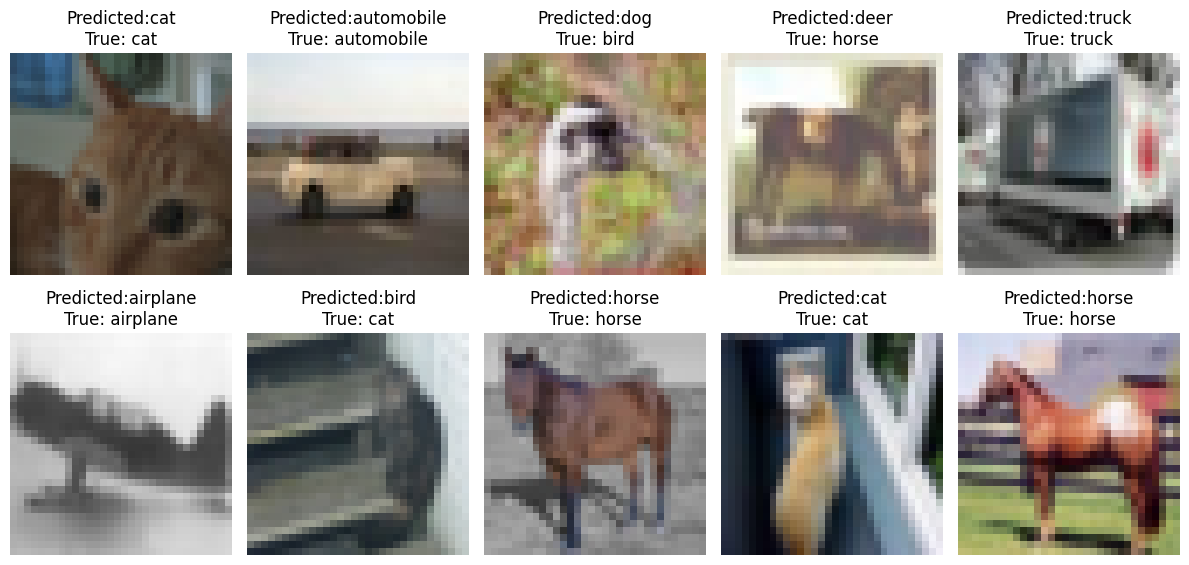

In [24]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i in range(num_images_to_show):
  axes[i].imshow(images_to_show[i])
  predicted_class = np.argmax(predicted_labels[i])
  true_class = labels_to_show[i][0]
  axes[i].set_title(f'Predicted:{cifar10_labels[predicted_class]}\nTrue: {cifar10_labels[true_class]}')
  axes[i].axis('off')
plt.tight_layout()
plt.show()
